<a href="https://colab.research.google.com/github/hma23/MachineLearning/blob/main/ExtraTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#To show all records for our data frame
pd.set_option("display.min_rows", 200)
pd.set_option("display.max_rows", 500)
pd.get_option("display.max_rows")

500

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Exploration and Preprocessing

In [4]:
df = pd.read_excel('/content/drive/MyDrive/data/Book1_new.xlsx')
#uncomment next line to show all values
df.head()

,Block_period,Block_size,Intensity,box_output,Latency
0,1,13,High,89,71.048
1,2,13,High,43,146.048
2,3,13,High,28,218.549
3,4,13,High,20,291.848
4,5,13,High,17,365.552


In [5]:
df.describe()

,Block_period,Block_size,box_output,Latency
count,190.000000,190.000000,190.000000,190.000000
mean,6.631579,12.226316,46.052632,412.643607
std,3.824324,3.342265,62.498824,387.241382
min,1.000000,7.000000,3.000000,11.035000
25%,4.000000,10.000000,9.250000,104.718917
50%,5.000000,13.000000,26.000000,251.401000
75%,10.000000,14.000000,62.000000,659.292825
max,14.000000,21.000000,589.000000,1645.100000


In [6]:
#sns.pairplot(df, height=3, aspect=1.3)

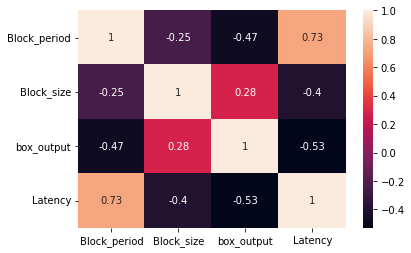

In [7]:
sns.heatmap(df.corr(), annot=True)

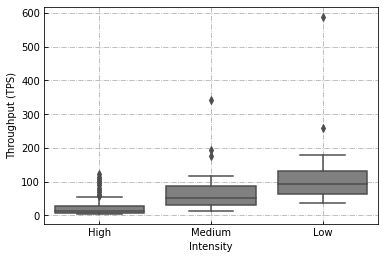

In [8]:
ax=sns.boxplot(x="Intensity", y="box_output", data=df, color='grey')
ax.grid('both', linestyle='-.')
ax.set_ylabel('Throughput (TPS)')
ax.set_axisbelow(True)
ax.tick_params(axis='both', direction='in')
#plt.savefig('Throughput.eps', format='eps', dpi=1000)

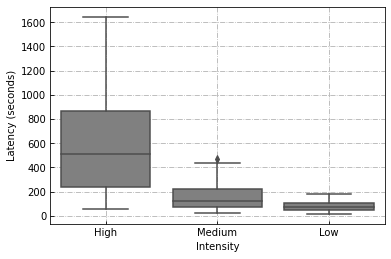

In [9]:
ax1=sns.boxplot(x="Intensity", y="Latency", data=df, color='grey')
ax1.grid('both', linestyle='-.')
ax1.set_ylabel('Latency (seconds)')
ax1.set_axisbelow(True)
ax1.tick_params(axis='both', direction='in')
#plt.savefig('Latency.eps', format='eps', dpi=1000)

In [10]:
# Make dummies for our catagorial variables to make it able to insert to machine learning models
df_all = df.copy()
df_all_dum = pd.get_dummies(df_all, prefix=['Intensity'], columns=['Intensity'])
#uncomment next line to show all values
# df_all_dum

In [11]:
# We will try to convert the intenisty to ordinal numbers and see the difference in accurcy using pycaret 
df_all_ordinal = df.copy()
df_all_ordinal = df_all_ordinal.replace({"Intensity":{"Low": 23600, "Medium": 35788, "High":143362 }})
#uncomment next line to show all values
# df_all_ordinal

### Comparison between different Models

In [12]:
!pip install pycaret

In [13]:
from pycaret.regression import *

### Predict box_output

In [14]:
#for dummy variable approche
df_ouput_dum = df_all_dum.copy()
df_ouput_dum.drop('Latency', axis=1, inplace=True)

#for numerical ordinal variable approche
df_ouput_ord = df_all_ordinal.copy()
df_ouput_ord.drop('Latency', axis=1, inplace=True)

#uncomment one of next line to show it's values
# df_ouput_dum
# df_ouput_ord

In [15]:
exp_reg101 = setup(data = df_ouput_ord, target = 'box_output', numeric_features = ['Block_period','Block_size','Intensity'], session_id=123)

,Description,Value
0,session_id,123
1,Target,box_output
2,Original Data,"(190, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(132, 3)"


In [16]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6.6435,1091.4478,15.8759,0.9408,0.1055,0.0777,0.360
gbr,Gradient Boosting Regressor,7.4212,1035.6056,15.4335,0.9367,0.1331,0.1084,0.038
rf,Random Forest Regressor,8.6183,1315.5203,18.7493,0.9153,0.1486,0.1099,0.408
dt,Decision Tree Regressor,11.1159,1369.2500,23.7514,0.8443,0.2016,0.1531,0.013
knn,K Neighbors Regressor,15.0304,2354.4702,29.8594,0.7688,0.2682,0.1859,0.060
ada,AdaBoost Regressor,21.0480,1770.2670,31.9032,0.6751,0.6505,0.9295,0.048
lightgbm,Light Gradient Boosting Machine,19.0264,2245.2876,32.4069,0.6616,0.6280,0.4558,0.052
llar,Lasso Least Angle Regression,27.2688,3245.0144,41.1229,0.4665,0.6910,1.0097,0.013
br,Bayesian Ridge,28.3402,2885.7628,40.2005,0.4179,0.7734,1.4871,0.012
en,Elastic Net,28.5719,2897.3036,40.3545,0.4093,0.7838,1.5357,0.012


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

***After we apply pycaret regression with intensity numeric ordinal and dummies variables, we note that max accurcy for dummies approch with is with gradiant boast regressor with R2 = .93 and for numeric ordinal. the best model is extra tree regressor with R2 = .94 so numeric approch is slightly better than dummies variable**

In [17]:
#split our data to y that contain our output "box_output" and to x that conatin the featuers inputs for our model
y_output=df_ouput_ord["box_output"]
x_output=df_ouput_ord.copy()
x_output.drop(columns = ['box_output'],inplace = True)
x_output.head()

,Block_period,Block_size,Intensity
0,1,13,143362
1,2,13,143362
2,3,13,143362
3,4,13,143362
4,5,13,143362


In [18]:
#split x,y to train and test to measure the accurcy of the model
X_train_output, X_test_output, y_train_output, y_test_output = train_test_split(x_output, y_output, test_size = 0.2, random_state = 10)

In [19]:
from sklearn.ensemble import ExtraTreesRegressor

def reg_out(rand):
  for i in range(rand):
    print('random state is',i)
    X_train_output, X_test_output, y_train_output, y_test_output = train_test_split(x_output, y_output, test_size = 0.1, random_state = i)
    reg = ExtraTreesRegressor(n_estimators=100, random_state=0,bootstrap=False, ccp_alpha=0.0, criterion='mse',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,n_jobs=-1, oob_score=False,
                        verbose=0, warm_start=False).fit(X_train_output, y_train_output)

    R2_score = reg.score(X_test_output, y_test_output)
    print("R2 score for this model is", R2_score)
    y_pred_output = reg.predict(X_test_output)
    MSE = ((y_pred_output-y_test_output)**2).mean()
    RMSE = (((y_pred_output-y_test_output)**2).mean())**.5
    print("RMSE score for this model is", RMSE)

# reg_out(50)

In [20]:
#from above equation we can note that the best random state is 1 to make model learning well and generlize for validation data
X_train_output, X_test_output, y_train_output, y_test_output = train_test_split(x_output, y_output, test_size = 0.1, random_state = 1)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0,bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,n_jobs=-1, oob_score=False,
                    verbose=0, warm_start=False).fit(X_train_output, y_train_output)

R2_score = reg.score(X_test_output, y_test_output)
print("R2 score for this model is", R2_score)

y_pred_output = reg.predict(X_test_output)
MSE = ((y_pred_output-y_test_output)**2).mean()
RMSE = (((y_pred_output-y_test_output)**2).mean())**.5
print("RMSE score for this model is", RMSE)

R2 score for this model is 0.9968461133890045
RMSE score for this model is 1.562639467459835


In [21]:
from sklearn.metrics import mean_squared_error
sk_mse_out = mean_squared_error(y_test_output, y_pred_output)
sk_rmse_out = sk_mse_out**.5
print("RMSE score for this model is", sk_rmse_out)

RMSE score for this model is 1.5626394674598347


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
#define your own mse and set greater_is_better=False
# mse = make_scorer(mean_squared_error,greater_is_better=False)

etr = ExtraTreesRegressor(n_estimators=100).fit(X_train_output, y_train_output)
                            
param_grid = {
    'n_estimators': [100,120,130,150],
    'criterion': ['mse', 'mae'],
    'max_depth': [80,100,110],
    #'oob_score': [True, False],
    'max_features': ['auto','sqrt','log2'],  
    #'bootstrap': [True, False],
    #'warm_start': [True, False],
    'min_samples_split': [1,2]
}

gcv = GridSearchCV(etr,param_grid,scoring='neg_root_mean_squared_error',cv=5,n_jobs=-1).fit(x_output,y_output)

# grid_result = gsc.fit(x_output, y_output)

print("Best: %f using %s" % (gcv.best_score_, gcv.best_params_))

Best: -19.935052 using {'criterion': 'mse', 'max_depth': 100, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


## Visualizations
### actual and predicted box_output vs Model featuers

In [23]:
#combine x_output,y_output and y_pred_all on one table to be able to visiualize it
y_pred_alloutput = reg.predict(x_output)

df_vis_output = x_output.copy()
df_vis_output['actual_output'] = y_output
df_vis_output['pred_output'] = y_pred_alloutput
df_vis_output.head()

,Block_period,Block_size,Intensity,actual_output,pred_output
0,1,13,143362,89,89.00
1,2,13,143362,43,43.00
2,3,13,143362,28,28.00
3,4,13,143362,20,20.00
4,5,13,143362,17,17.41


## Performance of ExtraTreeRegressor for Throughput

Max Error: -5


No handles with labels found to put in legend.


<Figure size 1440x720 with 0 Axes>

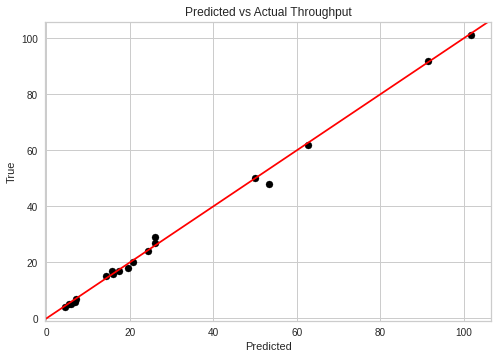

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = [20, 10])
base_color = sns.color_palette()[0]
 
# plt.subplot(1, 2, 1)
# # plot Block_period VS Latency
# _ = sns.scatterplot(data=df_vis_output, x='Block_period', y='actual_output', color=base_color)
# _ = sns.scatterplot(data=df_vis_output, x='Block_period', y='pred_output', color='red')
# plt.title('Block_period vs actual and prdicted output')
# plt.ylabel('Output')
# plt.xlabel('Block_period')
# plt.legend(['actual_output', 'pred_output'], loc='upper right')

# plt.subplot(1, 2, 2)
# # plot Block_size VS Latency
# _ = sns.scatterplot(data=df_vis_output, x='Block_size', y='actual_output', color=base_color)
# _ = sns.scatterplot(data=df_vis_output, x='Block_size', y='pred_output', color='red')
# plt.title('Block_size vs actual and predicted output')
# plt.ylabel('Output')
# plt.xlabel('Block_size')
# plt.legend(['actual_output', 'pred_output'], loc='upper right')

# plt.show()


#to see the relationship between the predicted values using scattered graph
## test

## residuals
residuals = y_test_output - y_pred_output
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true  = y_test_output.get(max_idx)
max_pred = y_pred_output[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(y_pred_output, y_test_output, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
#ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs Actual Throughput")
ax.legend()


## Plot predicted vs residuals
# ax[1].scatter(y_pred_output, residuals, color="red")
# ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
# ax[1].grid(True)
# ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
# ax[1].hlines(y=0, xmin=np.min(y_pred_output), xmax=np.max(y_pred_output))
# ax[1].legend()
# plt.show()


##Implement Gaussian Process Regression model for predicting Throughput and Latency

In [25]:
# Import gussian prosess from sklearn library and handle it's parameter then start to train our data using it
import sklearn.gaussian_process as gp
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
gp_model_output = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
gp_model_output.fit(X_train_output, y_train_output)

GaussianProcessRegressor(alpha=0.1, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [26]:
#example of how to predict value using gaussian_process model
gp_model_output.predict([[3,13,143362],[3,13,143362],[3,13,143362]])

array([30.71535485, 30.71535485, 30.71535485])

In [27]:
#Get y_pred to measure the accurcy using it and y_test
y_pred_output = gp_model_output.predict(X_test_output)

In [28]:
#here we are measure the mean squre error and root mean squre error
MSE = ((y_pred_output-y_test_output)**2).mean()
RMSE = (((y_pred_output-y_test_output)**2).mean())**.5
#show the value of root mean squre error
RMSE

3.5380304856525395

In [29]:
#Getting the R2 score (accurcy of regression model) from model
gp_model_output.score(X_test_output, y_test_output )

0.9838321735469169

In [30]:
#Implement the cross validation to get accurcy using different sets and get mean of all scores that will express the accurcy solving overfitting problem
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(gp_model_output, x_output, y_output, cv=cv, n_jobs=-1)
scores

array([0.98383217, 0.9759058 , 0.69685348, 0.93174674, 0.76728646,
       0.98917274, 0.91729934, 0.97032897, 0.924163  , 0.89926481])

In [31]:
scores.mean()

0.9055853524777833

##Implement Regression Neural Network Model to predict Throughput





In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [33]:
nu_model = Sequential()
nu_model.add(Dense(units=32, activation='relu', input_shape=[X_train_output.shape[1]]))
nu_model.add(Dropout(0.1))
nu_model.add(Dense(units=64, activation='relu'))
nu_model.add(Dense(units=1))

In [34]:
nu_model.compile(loss='mean_squared_error', optimizer=Adam())

In [35]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-4)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=400)

In [36]:
nu_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = nu_model.fit(X_train_output, y_train_output, validation_split=0.2, batch_size=32, epochs=1000, callbacks=[lrd, mcp, es])

Epoch 1/1000
5/5 [==============================] - 1s 49ms/step - loss: 9419625.0000 - val_loss: 118814.5078 - lr: 0.0010
Epoch 2/1000
5/5 [==============================] - 0s 12ms/step - loss: 6195337.0000 - val_loss: 758443.0625 - lr: 0.0010
Epoch 3/1000
5/5 [==============================] - 0s 12ms/step - loss: 3718576.2500 - val_loss: 32538.9922 - lr: 0.0010
Epoch 4/1000
5/5 [==============================] - 0s 12ms/step - loss: 4440325.0000 - val_loss: 1174619.5000 - lr: 0.0010
Epoch 5/1000
5/5 [==============================] - 0s 12ms/step - loss: 2038668.2500 - val_loss: 15808.6680 - lr: 0.0010
Epoch 6/1000
5/5 [==============================] - 0s 12ms/step - loss: 1902865.1250 - val_loss: 126958.4297 - lr: 0.0010
Epoch 7/1000
5/5 [==============================] - 0s 14ms/step - loss: 1302629.7500 - val_loss: 6989.2480 - lr: 0.0010
Epoch 8/1000
5/5 [==============================] - 0s 12ms/step - loss: 1512342.8750 - val_loss: 241565.9375 - lr: 0.0010
Epoch 9/1000
5/5 [=

In [38]:
nu_model.evaluate(X_test_output, y_test_output)

1/1 [==============================] - 0s 18ms/step - loss: 1002.4031


1002.403076171875

In [39]:
y_pred_output = nu_model.predict(X_test_output)
y_pred_output

array([[29.578747],
       [29.848156],
       [30.156017],
       [30.435558],
       [29.79774 ],
       [13.128063],
       [29.654186],
       [30.01588 ],
       [29.960705],
       [29.942028],
       [12.759014],
       [29.487194],
       [29.646618],
       [13.547558],
       [12.910168],
       [29.867931],
       [30.366955],
       [29.747692],
       [29.87611 ]], dtype=float32)

In [40]:
#showing the prdiction of some random points
nu_model.predict([[3,13,143362],[3,13,143362],[3,13,143362]])

array([[29.839123],
       [29.839123],
       [29.839123]], dtype=float32)

In [41]:
#geeting the r2 score for y_test and y_pred
from sklearn.metrics import r2_score
r2_score(y_test_output, y_pred_output)

-0.29470157774733496

In [42]:
#calculate the root mean square error for neural network model
RMSE = (((y_pred_output[:,0]-y_test_output)**2).mean())**.5
RMSE

31.660705636124938

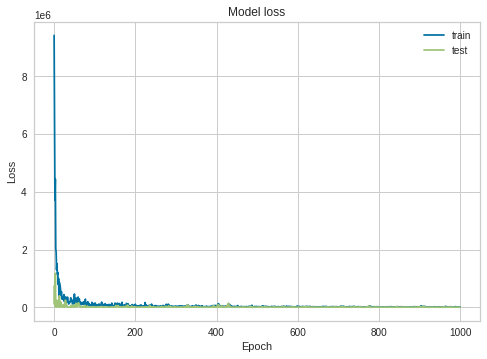

In [43]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**As we see from R2 and RMSE the neural network is very bad for these data and can not be able to detect the patterens from our small dataset so we will use best model we discoverd in pycaret Extra tree regroessor with numirc ordinal tenisty values**

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train_output, y_train_output)
reg.score(X_test_output, y_test_output)

0.9968461133890045

In [45]:
#showing the prdiction of some random points
reg.predict([[3,13,143362],[3,13,143362],[3,13,143362]])

array([28., 28., 28.])

## Predict Latency thru Neural networks regression 
### Comparison between different models in pycaret

In [46]:
#for dummy variable approach
df_laten_dum = df_all_dum.copy()
df_laten_dum.drop('box_output', axis=1, inplace=True)

#for numerical ordinal variable approach
df_laten_ord = df_all_ordinal.copy()
df_laten_ord.drop('box_output', axis=1, inplace=True)

#uncomment one of next line to show it's values
# df_laten_dum.head()
# df_laten_ord

In [47]:
exp_reg101 = setup(data = df_laten_dum, target = 'Latency', numeric_features = ['Block_period','Block_size'], session_id=123)

,Description,Value
0,session_id,123
1,Target,Latency
2,Original Data,"(190, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(132, 5)"


In [48]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,17.5122,1088.5077,28.5000,0.9933,0.1080,0.0752,0.364
gbr,Gradient Boosting Regressor,27.4762,1623.9351,38.3856,0.9888,0.1891,0.1420,0.041
rf,Random Forest Regressor,28.5001,1953.8883,39.7239,0.9871,0.1693,0.1349,0.409
dt,Decision Tree Regressor,45.4888,4102.1749,61.7987,0.9714,0.1764,0.1525,0.014
lightgbm,Light Gradient Boosting Machine,60.3390,8173.9975,85.8819,0.9402,0.3806,0.3034,0.022
ada,AdaBoost Regressor,79.3329,9884.5993,97.3343,0.9278,0.5127,0.6022,0.071
llar,Lasso Least Angle Regression,101.7077,19933.8098,137.5799,0.8497,0.6915,0.8799,0.014
lasso,Lasso Regression,102.3703,19846.1875,137.0728,0.8494,0.6389,0.9719,0.016
lar,Least Angle Regression,103.1232,19934.0796,137.3521,0.8489,0.6155,0.9884,0.016
lr,Linear Regression,103.1232,19934.0809,137.3521,0.8489,0.6155,0.9884,0.014


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

***Dummy approach here is better than numeric ordinal for intensity feature but with very little difference..R2 for Dummy = .9933 and also we get better RMSE and for ordinal = .9925 so we can use dummy here and the extra tree regressor is the best that get these accuracies in the two cases**

In [49]:
#split our data to y that contain our output "Latency" and to x that contain the features inputs for our model
y_lat=df_laten_dum["Latency"]
x_lat=df_laten_dum.copy()
x_lat.drop(columns = ['Latency'],inplace = True)
# x_lat.head()

#split x,y to train and test to measure the accurcy of the model
X_train_lat, X_test_lat, y_train_lat, y_test_lat = train_test_split(x_lat, y_lat, test_size = .1, random_state = 43)

## Try neural network for Latency

In [50]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train_lat)

# transform training data
X_train_norm = norm.transform(X_train_lat)

# transform testing dataabs
X_test_norm = norm.transform(X_test_lat)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Dropout

In [52]:
nu_model_lat = Sequential()
nu_model_lat.add(Dense(units=100, activation='relu', input_shape=[X_train_norm.shape[1]]))
nu_model_lat.add(Dense(units=1))

In [53]:
nu_model_lat.compile(loss='mean_squared_error', optimizer=Adam())
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 300,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-6)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=600)
nu_model_lat.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               600       
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [54]:
#lat_history = nu_model_lat.fit(X_train_norm, y_train_lat, validation_split=0.2, batch_size=32, epochs=8000, callbacks=[lrd, mcp, es])
lat_history = nu_model_lat.fit(X_train_norm, y_train_lat, validation_split=0.2, batch_size=32, epochs=1000, callbacks=[lrd, mcp, es])

Epoch 1/1000
5/5 [==============================] - 0s 33ms/step - loss: 359038.8750 - val_loss: 247146.2812 - lr: 0.0010
Epoch 2/1000
5/5 [==============================] - 0s 10ms/step - loss: 358940.1562 - val_loss: 247061.6250 - lr: 0.0010
Epoch 3/1000
5/5 [==============================] - 0s 11ms/step - loss: 358842.5938 - val_loss: 246975.6562 - lr: 0.0010
Epoch 4/1000
5/5 [==============================] - 0s 10ms/step - loss: 358745.4688 - val_loss: 246887.3750 - lr: 0.0010
Epoch 5/1000
5/5 [==============================] - 0s 10ms/step - loss: 358641.6562 - val_loss: 246795.3438 - lr: 0.0010
Epoch 6/1000
5/5 [==============================] - 0s 11ms/step - loss: 358533.1250 - val_loss: 246699.7500 - lr: 0.0010
Epoch 7/1000
5/5 [==============================] - 0s 11ms/step - loss: 358421.9375 - val_loss: 246598.7188 - lr: 0.0010
Epoch 8/1000
5/5 [==============================] - 0s 12ms/step - loss: 358301.2812 - val_loss: 246491.4844 - lr: 0.0010
Epoch 9/1000
5/5 [======

In [55]:
nu_model_lat.evaluate(X_test_norm, y_test_lat)

1/1 [==============================] - 0s 17ms/step - loss: 16779.5078


16779.5078125

In [56]:
nu_model_lat.predict([[3,13,1,0,0]])

array([[-2421.5093]], dtype=float32)

In [57]:
y_pred_lat = nu_model_lat.predict(X_test_norm)
# y_pred_output

In [58]:
from sklearn.metrics import r2_score
RMSE = (((y_pred_lat[:,0]-y_test_lat)**2).mean())**.5
print('R2 score is',r2_score(y_test_lat, y_pred_lat))
print('RMSE is',RMSE)

R2 score is 0.789916910516351
RMSE is 129.53572632162206


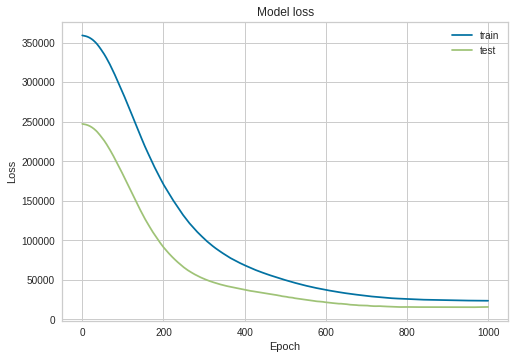

In [59]:
from matplotlib import pyplot as plt
plt.plot(lat_history.history['loss'])
plt.plot(lat_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [60]:
nu_model_lat.predict([[3,13,1,0,0]])

array([[-2421.5093]], dtype=float32)

## Extra Tree Regressor for Latency



In [61]:
from sklearn.ensemble import ExtraTreesRegressor

reg_lat = ExtraTreesRegressor(n_estimators=100, random_state=0, bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=50, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_jobs=-1, oob_score=False,
                    verbose=0, warm_start=False).fit(X_train_lat, y_train_lat)

R2_score = reg_lat.score(X_test_lat, y_test_lat)
print("R2 score for this model is", R2_score)

y_pred_lat = reg_lat.predict(X_test_lat)
MSE = ((y_pred_lat-y_test_lat)**2).mean()
RMSE = (((y_pred_lat-y_test_lat)**2).mean())**.5
print("RMSE score for this model is", RMSE)



R2 score for this model is 0.9984531017276932
RMSE score for this model is 11.115394833647999


In [62]:
y_pred_all = reg_lat.predict(x_lat)

In [63]:
# RMSE for all data
from sklearn.metrics import mean_squared_error
sk_mse_all = mean_squared_error(y_lat, y_pred_all)
sk_rmse_all = sk_mse_all**.5
print("RMSE score for this model is", sk_rmse_all)

RMSE score for this model is 3.514997234669781


In [64]:
# RMSE for validation data
from sklearn.metrics import mean_squared_error
sk_mse = mean_squared_error(y_test_lat, y_pred_lat)
sk_rmse = sk_mse**.5
print("RMSE score for this model is", sk_rmse)

RMSE score for this model is 11.115394833647997


In [65]:
# y_pred_lat = reg.predict(X_test_lat)
# y_pred_lat

In [66]:
# MSE = ((y_pred_lat-y_test_lat)**2).mean()
# RMSE = (((y_pred_lat-y_test_lat)**2).mean())**.5
# RMSE

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
#define your own mse and set greater_is_better=False
# mse = make_scorer(mean_squared_error,greater_is_better=False)

etr_lat = ExtraTreesRegressor(n_estimators=100,random_state=0, bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_jobs=-1, oob_score=False,
                    verbose=0, warm_start=False).fit(X_train_lat, y_train_lat)

                            
param_grid = {
    'n_estimators': [50,100],
    # 'criterion': ['mse', 'mae'],
    'max_depth': [50,60,80],
    # 'oob_score': [True, False],
    'max_features': ['auto','sqrt','log2'],    
    # 'bootstrap': [True, False],
    # 'warm_start': [True, False],
}

gcv = GridSearchCV(etr_lat,param_grid,scoring='neg_root_mean_squared_error',cv=20,n_jobs=-1).fit(x_lat,y_lat)
#gcv = GridSearchCV(etr_lat,param_grid,scoring='r2',cv=20,n_jobs=-1).fit(x_lat,y_lat)

# grid_result = gsc.fit(x_output, y_output)

print("Best: %f using %s" % (gcv.best_score_, gcv.best_params_))

Best: -35.775925 using {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 100}


In [68]:
#combine x_test,y_test and y_pred on one table to be able to visualise it
df_vis_lat = x_lat.copy()
df_vis_lat['actual_latency'] = y_lat
df_vis_lat['prdicted_latency'] = y_pred_all
df_vis_lat.head()

,Block_period,Block_size,Intensity_High,Intensity_Low,Intensity_Medium,actual_latency,prdicted_latency
0,1,13,1,0,0,71.048,72.730933
1,2,13,1,0,0,146.048,146.048000
2,3,13,1,0,0,218.549,218.058799
3,4,13,1,0,0,291.848,291.848000
4,5,13,1,0,0,365.552,365.552000


## Assess Performance of the ExtraTreeRegressor model for Latency





No handles with labels found to put in legend.


Max Error: 42


<Figure size 1440x720 with 0 Axes>

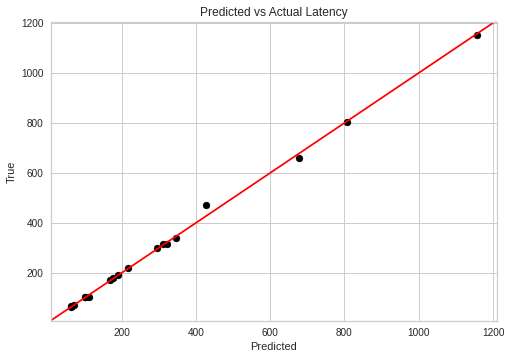

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize = [20, 10])
base_color = sns.color_palette()[0]
 
# plt.subplot(1, 2, 1)
# # plot Block_period VS Latency
# _ = sns.scatterplot(data=df_vis_lat, x='Block_period', y='actual_latency', color=base_color)
# _ = sns.scatterplot(data=df_vis_lat, x='Block_period', y='prdicted_latency', color='red')
# plt.title('Block period vs actual and prdicted latency')
# plt.ylabel('Latency')
# plt.xlabel('Block_period')
# plt.legend(['y_test_lat', 'y_pred_lat'], loc='upper left')

# plt.subplot(1, 2, 2)
# # plot Block_size VS Latency
# _ = sns.scatterplot(data=df_vis_lat, x='Block_size', y='actual_latency', color=base_color)
# _ = sns.scatterplot(data=df_vis_lat, x='Block_size', y='prdicted_latency', color='red')
# plt.title('Block size vs actual and prdicted latency')
# plt.ylabel('Latency')
# plt.xlabel('Block_size')
# plt.legend(['actual_latency', 'prdicted_latency'], loc='upper right')

# plt.show()

## residuals
residuals = y_test_lat - y_pred_lat
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true  = y_test_lat.get(max_idx)
max_pred = y_pred_lat[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

from statsmodels.graphics.api import abline_plot
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(y_pred_lat, y_test_lat, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax)
#ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax.grid(True)
ax.set(xlabel="Predicted", ylabel="True", title="Predicted vs Actual Latency")
ax.legend()